### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
raw_data=pd.read_csv("/content/Bengaluru_House_Data.csv",encoding="latin-1")
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


In [3]:
# getting the shape of data
raw_data.shape

(13320, 13)

In [4]:
# getting list of columns
raw_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

### Basic Data cleaning

In [5]:
# Dropping unwanted columns
data=raw_data.drop(columns=['Unnamed: 9', 'Unnamed: 10','Unnamed: 11', 'Unnamed: 12'])

In [6]:
# Finding duplicate rows
data.duplicated().sum()

511

In [7]:
# Duplicate rows
data[data.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57


In [8]:
# Dropping duplicate rows
data.drop_duplicates(inplace=True)

In [9]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [10]:
data.shape

(12809, 9)

### Exploratory Data Analysis

In [11]:
# Basic info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12808 non-null  object 
 3   size          12793 non-null  object 
 4   society       7474 non-null   object 
 5   total_sqft    12809 non-null  object 
 6   bath          12736 non-null  float64
 7   balcony       12204 non-null  float64
 8   price         12809 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1000.7+ KB


##### Inference

1. There are 7 categorical columns and 2 numerical columns.
2. Among these 7 categorical columns "total_sqft" and "price" are numericals by nature, others can be converted into numericals.
3. There are null values in the data.

In [12]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5335
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

##### Inference

1. There are 5 columns with null values.
2. There is only 1 null value in "location" column and 16 null values in the "size" column, these rows can be dropped if no specific/special information is found.
3. Null values in other columns must be imputed.

Next step is to look for outliers, but before that categorical columns which can be converted into numericals without encoding are converted to numbers.

### Basic Feature Engineering

#### Price

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
pd.Series(data["price"].unique())

0          $39.07 
1         $120.00 
2          $62.00 
3          $95.00 
4          $51.00 
5          $38.00 
6         $204.00 
7         $600.00 
8          $63.25 
9         $370.00 
10         $70.00 
11        $295.00 
12         $40.00 
13        148-150 
14         $73.50 
15         $48.00 
16         $60.00 
17        $290.00 
18         $15.00 
19        $122.00 
20        $380.00 
21        $103.00 
22       25.25-30 
23              56
24            23.1
25              81
26           48.77
27              47
28             186
29              35
30             123
31           57.39
32             125
33              36
34            45.5
35           56.12
36              45
37              38
38              48
39           91.79
40             200
41              33
42           94.82
43             130
44              50
45              99
46              91
47              75
48              44
49             192
50             185
51             150
52          

In [15]:
pd.reset_option('display.max_rows')

##### Inference

1. The prices are in different format such as
<br>  i) $price
 <br> ii)price range (a-b)
 <br> iii)? price
 <br> iv)special character price
 <br> v) price

In [ ]:
data["price"].nunique()

2205

In [ ]:
data.iloc[87]

area_type       Super built-up  Area
availability                  17-Sep
location                  Dasanapura
size                           2 BHK
society                      Tavenew
total_sqft                       708
bath                             2.0
balcony                          2.0
price                       ? 37.00 
Name: 87, dtype: object

In [ ]:
data.iloc[2922]

area_type       Super built-up  Area
availability                  18-Aug
location             Electronic City
size                           2 BHK
society                      Prarkun
total_sqft                      1128
bath                             2.0
balcony                          1.0
price                          65.35
Name: 2948, dtype: object

In [ ]:
data["price"].sample(n=15)

6461          46.5
1029          64.5
13273           22
3282           125
8971            65
87        ? 37.00 
6947       75.00 
4560            60
4485           220
509             70
11590         31.2
9767           259
2922         99.27
3039            89
760             39
Name: price, dtype: object

In [ ]:
pd.Series(data["price"].unique()).sample(n=100)

1468       32.63 
279          47.12
462            270
1008         48.42
2129         35.56
483            163
1538         25.29
1107           306
930          91.84
565          38.65
742          31.83
218             26
2142           948
1011         65.12
2159         28.47
204       ? 80.90 
1922         40.21
1898          59.9
1482       78.00 
143      ? 100.00 
824          91.15
78        ? 58.06 
1016         49.88
1515       50.19 
66              40
1565         70.39
1226           950
1386          17.5
98       ? 120.00 
1033          52.6
2014         69.43
506          61.92
906          43.91
372          32.49
2143           649
1000         29.46
1007         93.25
1724         49.06
251           18.5
1149          42.8
1589         74.18
180      ? 129.00 
17        $290.00 
822          83.33
1501       71.50 
2105          96.9
1306          1150
1996         76.16
1074         33.82
1049         34.63
1478       32.00 
134      ? 760.00 
268         

In [ ]:
pd.Series(data["price"].unique()).sample(n=50)

327         53.67
512         56.25
827         424.5
310         68.75
1038        34.82
1306         1150
191      ? 95.00 
202      ? 73.95 
2161        80.51
604         42.72
904         19.82
440        15.135
1571       50.125
586         37.49
1280        41.82
25             81
1732         64.7
1804        37.15
1361        59.99
1232        78.25
2150          183
1340        268.5
691           217
990           720
300         42.16
1214        71.13
2190         2800
1141        94.36
1085       48.905
796         43.55
1339        67.73
1908          298
1627        60.42
1696        27.43
1302        42.69
1924         2340
1771        69.45
522        65.255
914         43.71
2197        71.58
1743          309
1943        42.15
1217          272
503         54.54
1362        30.29
1552        25.65
288           252
371            87
1036        46.95
680          72.5
dtype: object

In [ ]:
data["price"].sample(n=50)

6357            47
9755         77.61
6781          1100
9069            27
9032           307
2194           110
9336         76.13
4010            58
8266           125
2525         43.79
5348           899
250       ? 20.00 
1041            90
381             90
7779            35
7036            40
6123           102
6285           110
8518          72.5
9533         76.18
7029            95
8072            48
13197         2600
10869           70
3744         46.95
933          39.73
12749           50
4047            90
7370           333
2583            79
7932         19.87
6852       45.60 
5845            47
12858           42
12092          340
10818        39.89
4546            60
5704            25
1939           135
7461            60
9176            57
5642            76
5184           250
1500            75
7284           115
459            360
6514            69
10499           60
306             26
1533         92.15
Name: price, dtype: object

In [ ]:
data.loc[6852]

area_type       Super built-up  Area
availability           Ready To Move
location                  Begur Road
size                           2 BHK
society                      Dhalsh 
total_sqft                      1200
bath                             2.0
balcony                          2.0
price                        45.60 
Name: 6852, dtype: object

In [19]:
data.loc[6852]["price"].replace("\x80","")

'  45.60 '

In [27]:
# converting different format of price to numbers

def price_transform(raw_price):
  if "$" in raw_price:
    price=raw_price.replace("$","")
  elif "?" in raw_price:
    price=raw_price.replace("?","")
  elif "-" in raw_price:
    temp=raw_price.split("-")
    price=str((float(temp[0].strip())+float(temp[1].strip()))/2)
  elif raw_price.isprintable():
    price=raw_price
  else:
    price=raw_price.replace("\x80","")

  return float(price.strip())

In [29]:
data["price"]=data["price"].apply(price_transform)

#### Size

In [30]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
data[data["size"]=="1 RK"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
24,Super built-up Area,18-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,0.0,27.625
782,Super built-up Area,Ready To Move,Thanisandra,1 RK,Bhmesy,445,1.0,0.0,28.000
1363,Super built-up Area,21-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,1.0,25.250
2486,Super built-up Area,19-Dec,Bhoganhalli,1 RK,Rosha I,296,1.0,0.0,22.890
2557,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.0,1.0,16.000
2788,Super built-up Area,20-Aug,Rachenahalli,1 RK,AsNowre,440,1.0,0.0,28.000
4876,Built-up Area,Ready To Move,Electronic City,1 RK,GMown E,435,1.0,1.0,19.500
5079,Built-up Area,17-Jun,Whitefield,1 RK,Prtates,905,1.0,1.0,52.000
5285,Super built-up Area,18-May,Rachenahalli,1 RK,AsNowre,385 - 440,1.0,0.0,19.800
6586,Super built-up Area,Ready To Move,Electronics City Phase 1,1 RK,NaN,360,1.0,0.0,16.900


In [32]:
data[data["size"]=="1 BHK"]["total_sqft"].unique()

array(['600', '450', '705', '589', '645', '525', '630', '500', '530',
       '451', '34.46Sq. Meter', '375', '1200', '595', '715', '416', '834',
       '711', '469', '750', '425', '667', '1000Sq. Meter', '650',
       '520 - 645', '930', '686', '1300', '400', '650 - 665', '633 - 666',
       '665', '15', '950', '700', '697', '710', '565', '485', '680',
       '785', '440', '764', '340', '628', '580 - 650', '520', '551',
       '654', '660 - 670', '620 - 933', '1050', '884', '640', '688',
       '765', '671', '581.91', '360', '670 - 980', '825', '515',
       '645 - 936', '668', '960', '395', '605', '714', '596 - 804', '693',
       '674', '590', '760', '606', '527', '660', '730', '890', '734',
       '794', '1351', '648', '905', '900', '613 - 648', '615', '460',
       '673', '664', '685', '2400', '923', '420', '596', '910', '532',
       '550', '350', '835', '703', '965', '1500', '813', '735',
       '381 - 535', '524 - 894', '607', '540 - 670', '656', '620', '833',
       '669', '708

In [36]:
data[data["size"]=="1 RK"]["price"].median()

27.0

In [37]:
data[data["size"]=="1 BHK"]["price"].median()

32.64

Hall and Kitchen is available in all house so the numbers in the field represents the number of bedrooms, so its better to extract only the numbers.

And the 1 RK house represent 1 room and kitchen which is not equivalent to 1 BHK so its converted to 0.5 BHK

In [44]:
data.loc[data["size"]=="1 RK","size"]="0.5 BHK"


In [45]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '0.5 BHK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [49]:
data["size"]=data["size"].str.split().str[0]

In [124]:
data["size"]=data["size"].astype("float")

#### Total sqft

In [55]:
data["total_sqft"].nunique()

2117

In [57]:
pd.set_option('display.max_rows',None)

In [60]:
pd.Series(data["total_sqft"].unique())

0                    1056
1                    2600
2                    1440
3                    1521
4                    1200
5                    1170
6                    2732
7                    3300
8                    1310
9                    1020
10                   1800
11                   2785
12                   1000
13                   1100
14                   2250
15                   1175
16                   1180
17                   1540
18                   2770
19                    600
20                   1755
21                   2800
22                   1767
23                    510
24                   1250
25                    660
26                   1610
27                   1151
28                   1025
29            2100 - 2850
30                   1075
31                   1760
32                   1693
33                   1925
34                    700
35                   1070
36                   1724
37                   1290
38          

In [61]:
pd.reset_option('display.max_rows')

##### Inference

1. The "total_sqft" column has different format
<br> i)sqft
<br>ii)Sq. Meter
<br>iii)Acres
<br>iv)Sq. Yards
<br>v)Cents
<br>vi)Guntha
<br>vii) Perch
<br>viii)Grounds
<br>iX) sqft range

In [66]:
def sqft_transform(raw_sqft):
  if "Meter" in raw_sqft:
    sqft=float(raw_sqft[0:-9])*10.7639
  elif "Yards" in raw_sqft:
    sqft=float(raw_sqft[0:-9])*9
  elif "Cents" in raw_sqft:
    sqft=float(raw_sqft[0:-5])*435.56
  elif "Guntha" in raw_sqft:
    sqft=float(raw_sqft[0:-6])*1089
  elif "Perch" in raw_sqft:
    sqft=float(raw_sqft[0:-5])*272.25
  elif "Grounds" in raw_sqft:
    sqft=float(raw_sqft[0:-7])*2400.35
  elif "Acres" in raw_sqft:
    sqft=float(raw_sqft[0:-5])*43560
  elif "-" in raw_sqft:
    temp=raw_sqft.split("-")
    sqft=(float(temp[0].strip())+float(temp[1].strip()))/2
  else:
    sqft=float(raw_sqft)
  return sqft

In [68]:
data["total_sqft"]=data["total_sqft"].apply(sqft_transform)

#### Availability

Calculating number of days from today

In [ ]:
data["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [74]:
from datetime import datetime
year=datetime.now().year

In [120]:
today=pd.to_datetime(datetime.today())
def availability_transform(date):
  if date not in ['Ready To Move','Immediate Possession']:
    day=pd.to_datetime(date+"-"+str(year),format="%d-%b-%Y")
    no_of_days=(today-day).days
  else:
    no_of_days=0
  if no_of_days<0:
    no_of_days=365+no_of_days
  return no_of_days

In [125]:
data["availability"]=data["availability"].apply(availability_transform)

In [122]:
data["availability"].apply(availability_transform).unique()

array([208,   0,  58, 147, 239, 207, 271, 206, 299, 298, 119, 145,  88,
       329, 270, 118, 301, 209, 332,  87,  27, 205, 174, 331, 177, 363,
       362,  24,  56, 330, 300,  59,  28,  55, 178, 117, 210, 121,  26,
        23, 361, 144,  57, 240, 268,  25, 146, 267, 175, 120,  89,  54,
       269, 359, 236, 116, 211, 115, 176, 297, 328, 243, 238, 242, 364,
        30, 148, 237, 360, 302, 273, 212, 272, 235, 334, 179, 241,  86,
       180,   1])

Feature Engineering is performed on all categorical columns with numerical values.

Now, Back to EDA.

Outliers can be checked for numerical columns

In [126]:
data.describe()

,availability,size,total_sqft,bath,balcony,price
count,12809.000000,12793.000000,1.280900e+04,12736.000000,12204.000000,12809.000000
mean,36.300570,2.816423,1.934977e+03,2.707522,1.582022,117.453784
std,85.447742,1.312140,1.761739e+04,1.357193,0.822275,402.056428
min,0.000000,0.500000,1.000000e+00,1.000000,0.000000,8.000000
25%,0.000000,2.000000,1.100000e+03,2.000000,1.000000,50.000000
50%,0.000000,3.000000,1.282000e+03,2.000000,2.000000,73.000000
75%,0.000000,3.000000,1.693000e+03,3.000000,2.000000,121.000000
max,364.000000,43.000000,1.306800e+06,40.000000,3.000000,42278.000000


#### Dealing with Outliers

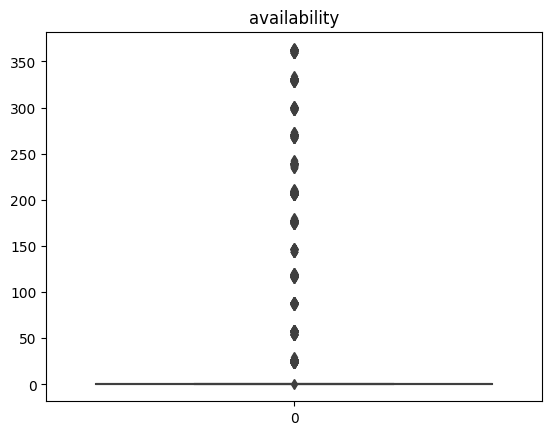

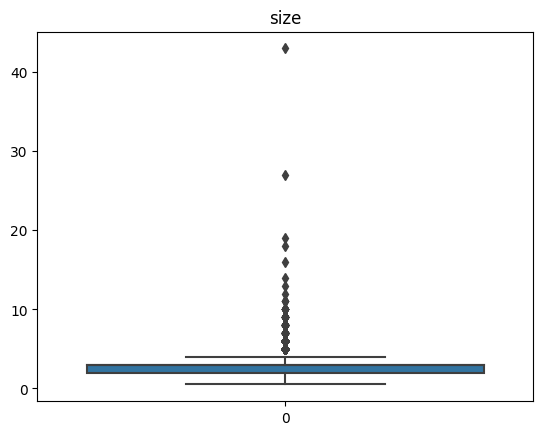

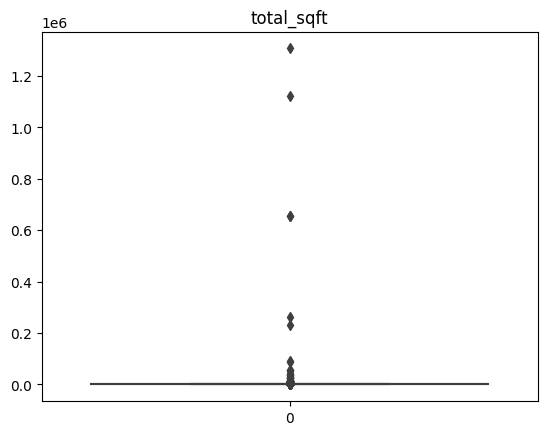

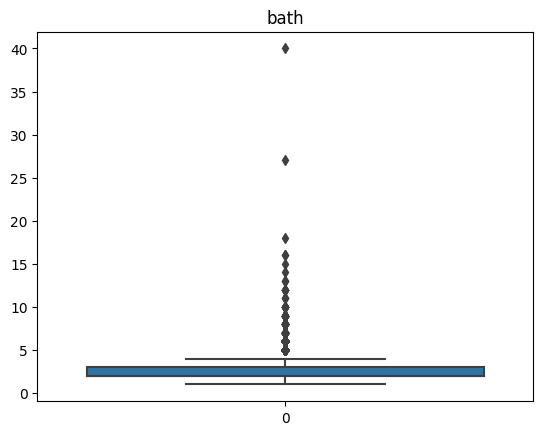

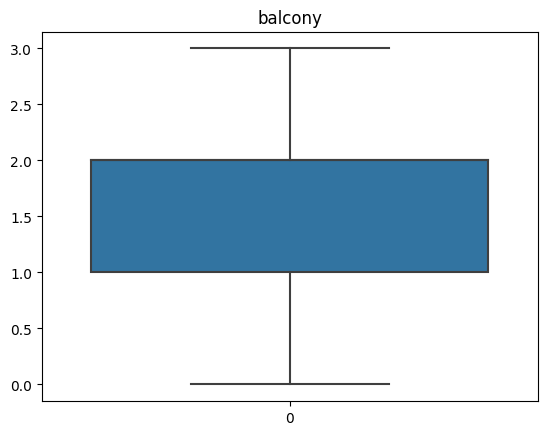

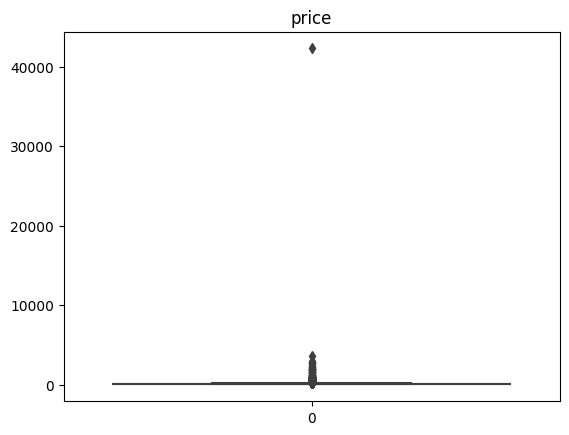

In [129]:
for i in data.select_dtypes(include="number").columns:
  plt.title(i)
  sns.boxplot(data[i])
  plt.show()


Except "Balcony" column all other columns has outliers.

##### Price

<Axes: xlabel='price', ylabel='Count'>

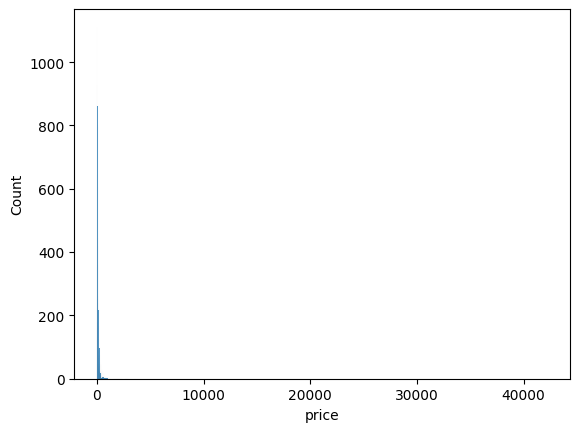

In [138]:
sns.histplot(data["price"])

In [142]:
data[data["price"]>5000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1311,Super built-up Area,0,D Souza Layout,3.0,Niateki,4634.0,4.0,3.0,42278.0


This row has price of 42278 which is a outlier.

It changes the whole distribution.

So this data is removed.

In [146]:
data.drop(1311,inplace=True)
data[data["price"]>5000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


<Axes: xlabel='price', ylabel='Count'>

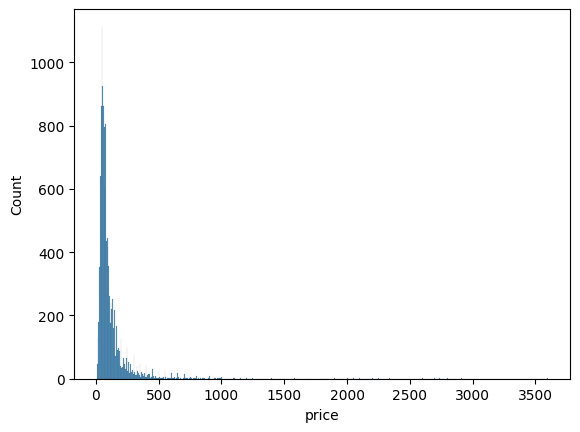

In [147]:
sns.histplot(data["price"])

<Axes: >

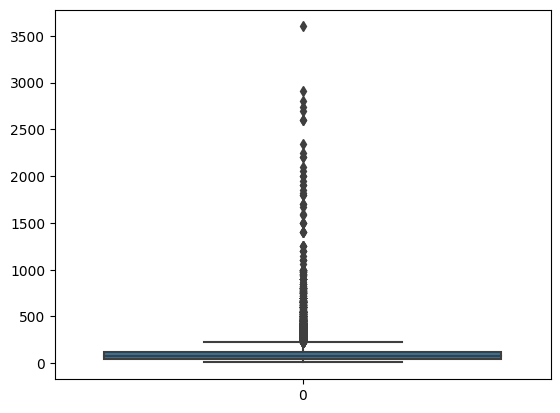

In [148]:
sns.boxplot(data["price"])

In [195]:
data[data["price"]>1000].shape

(44, 9)

In [196]:
data[data["price"]>500].shape

(240, 9)

Only 240 rows are having prices above 500.

These can be capped or removed.

Based on the other columns distribution, the decision can be made.

##### Size

<Axes: >

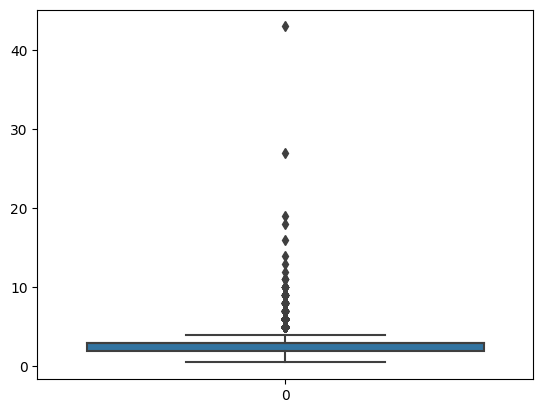

In [151]:
sns.boxplot(data["size"])

<Axes: xlabel='size', ylabel='Count'>

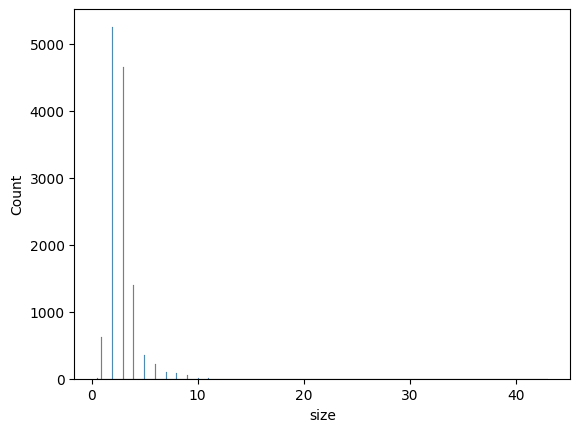

In [150]:
sns.histplot(data["size"])

In [153]:
data[data["size"]>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
459,Super built-up Area,0,1 Giri Nagar,11.0,Bancyri,5000.0,9.0,3.0,360.0
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
1768,Plot Area,0,1 Ramamurthy Nagar,11.0,NaN,1200.0,11.0,0.0,170.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
3853,Plot Area,0,1 Annasandrapalya,11.0,NaN,1200.0,6.0,3.0,150.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
6533,Plot Area,0,Mysore Road,12.0,NaN,2232.0,6.0,2.0,300.0
7979,Super built-up Area,0,1 Immadihalli,11.0,NaN,6000.0,12.0,NaN,150.0


In [154]:
data[(data["size"]>5)& (data["size"]<10)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9,Plot Area,0,Gandhi Bazar,6.0,NaN,1020.0,6.0,NaN,370.0
45,Plot Area,0,HSR Layout,8.0,NaN,600.0,9.0,NaN,200.0
58,Plot Area,0,Murugeshpalya,6.0,NaN,1407.0,4.0,1.0,150.0
64,Built-up Area,0,Bommanahalli,8.0,NaN,3000.0,8.0,0.0,140.0
68,Plot Area,0,Devarachikkanahalli,8.0,NaN,1350.0,7.0,0.0,85.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,0,Laggere,7.0,NaN,1590.0,9.0,3.0,132.0
13221,Plot Area,0,T Dasarahalli,9.0,NaN,1178.0,9.0,1.0,75.0
13226,Built-up Area,0,Raja Rajeshwari Nagar,8.0,NaN,6000.0,8.0,3.0,215.0
13277,Plot Area,0,Kundalahalli Colony,7.0,NaN,1400.0,7.0,NaN,218.0


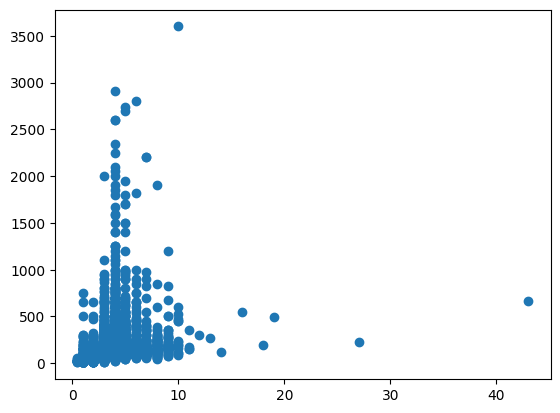

In [155]:
plt.scatter(data["size"],data["price"])

<Axes: xlabel='size', ylabel='Density'>

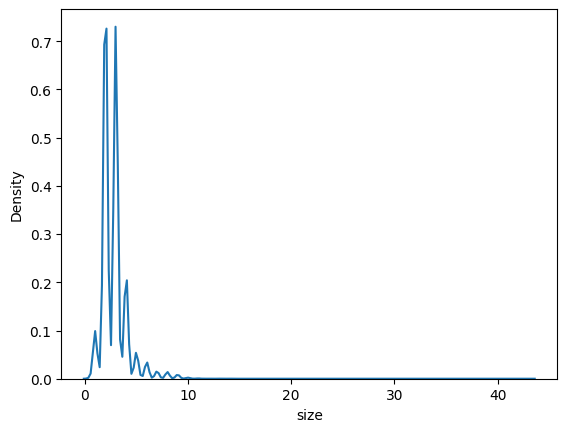

In [158]:
sns.kdeplot(data["size"])

The "size" column has few outliers.

The can be capped because the price is within the range.

In [156]:
data[data["price"]>3500]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,0,Defence Colony,10.0,NaN,7150.0,13.0,NaN,3600.0


##### Bath

<Axes: >

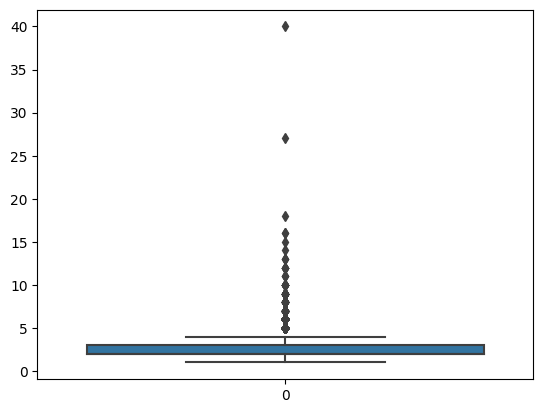

In [161]:
sns.boxplot(data["bath"])

<Axes: xlabel='bath', ylabel='Count'>

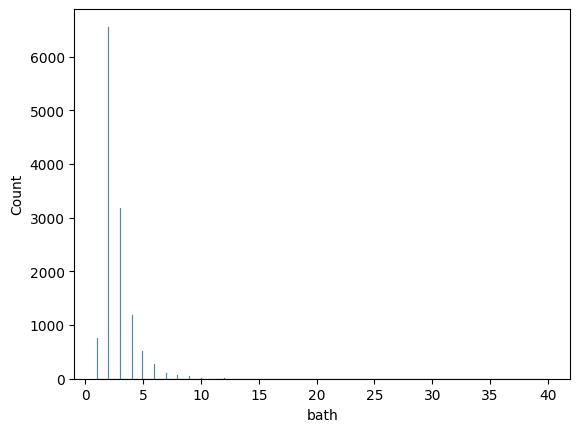

In [162]:
sns.histplot(data["bath"])

In [163]:
data[data["bath"]>5]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9,Plot Area,0,Gandhi Bazar,6.0,NaN,1020.0,6.0,NaN,370.0
45,Plot Area,0,HSR Layout,8.0,NaN,600.0,9.0,NaN,200.0
64,Built-up Area,0,Bommanahalli,8.0,NaN,3000.0,8.0,0.0,140.0
68,Plot Area,0,Devarachikkanahalli,8.0,NaN,1350.0,7.0,0.0,85.0
79,Built-up Area,0,ISRO Layout,6.0,NaN,4400.0,6.0,3.0,250.0
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,0,Laggere,7.0,NaN,1590.0,9.0,3.0,132.0
13221,Plot Area,0,T Dasarahalli,9.0,NaN,1178.0,9.0,1.0,75.0
13226,Built-up Area,0,Raja Rajeshwari Nagar,8.0,NaN,6000.0,8.0,3.0,215.0
13277,Plot Area,0,Kundalahalli Colony,7.0,NaN,1400.0,7.0,NaN,218.0


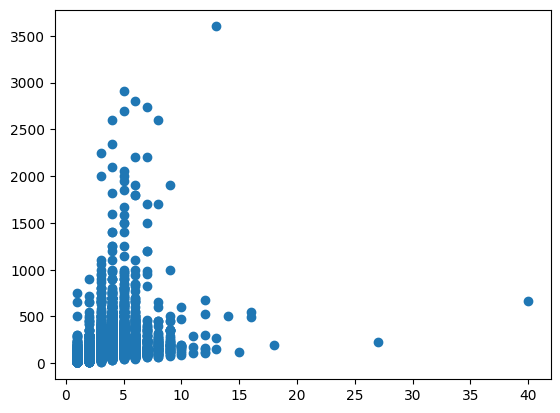

In [168]:
plt.scatter(data["bath"],data["price"])

This distribution is similar to "size" column.

these outliers also can be capped.

In [167]:
data[data["bath"]>13]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1078,Plot Area,0,BTM 1st Stage,9.0,Srvasks,3300.0,14.0,NaN,500.0
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
11559,Plot Area,88,1Kasavanhalli,18.0,HMwerCo,1200.0,18.0,NaN,200.0


In [171]:
data[data["size"]>13]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1718,Super built-up Area,0,2Electronic City Phase II,27.0,NaN,8000.0,27.0,0.0,230.0
3379,Super built-up Area,0,1Hanuman Nagar,19.0,NaN,2000.0,16.0,NaN,490.0
3609,Super built-up Area,0,Koramangala Industrial Layout,16.0,NaN,10000.0,16.0,NaN,550.0
4684,Plot Area,0,Munnekollal,43.0,NaN,2400.0,40.0,0.0,660.0
4916,Super built-up Area,0,1Channasandra,14.0,NaN,1250.0,15.0,0.0,125.0
11559,Plot Area,88,1Kasavanhalli,18.0,HMwerCo,1200.0,18.0,NaN,200.0


The extreme outliers of "size" column and "bath" column are common.

There are only few rows of data with extreme outliers, so these can be removed.

##### Availability

In [130]:
data[data["availability"]>300]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
71,Super built-up Area,329,Begur Road,2.0,Pruthg,1358.0,2.0,1.0,80.58
87,Super built-up Area,301,Dasanapura,2.0,Tavenew,708.0,2.0,2.0,37.00
94,Super built-up Area,332,Thanisandra,2.0,Bhmesy,1296.0,2.0,3.0,80.00
136,Super built-up Area,331,Devanahalli,2.0,Derdsig,1360.0,2.0,1.0,65.00
144,Super built-up Area,363,Anandapura,2.0,ViensRK,1167.0,2.0,1.0,43.76
...,...,...,...,...,...,...,...,...,...
13044,Super built-up Area,361,Kanakpura Road,3.0,Soazak,1596.0,3.0,1.0,118.00
13072,Super built-up Area,331,Whitefield,2.0,SSdhimr,1240.0,2.0,2.0,41.00
13145,Plot Area,362,Bommasandra,3.0,NaN,1200.0,3.0,2.0,110.00
13224,Super built-up Area,331,Chandapura,1.0,SuVue S,520.0,1.0,1.0,14.04


In [131]:
data[(data["availability"]<300)& (data["availability"]>200)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,208,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.070
21,Super built-up Area,208,Binny Pete,3.0,She 2rk,1755.0,3.0,1.0,122.000
24,Super built-up Area,239,Thanisandra,0.5,Bhe 2ko,510.0,1.0,0.0,27.625
27,Built-up Area,207,Whitefield,3.0,NaN,1610.0,3.0,2.0,81.000
28,Super built-up Area,271,Ramagondanahalli,2.0,ViistLa,1151.0,2.0,2.0,48.770
...,...,...,...,...,...,...,...,...,...
13255,Super built-up Area,208,Marathahalli,2.0,PrensKe,1146.0,2.0,1.0,69.000
13258,Super built-up Area,208,Whitefield,1.0,Oreldhi,877.0,1.0,1.0,59.000
13259,Super built-up Area,208,Kanakapura,3.0,GoityEt,1477.0,2.0,1.0,69.500
13265,Super built-up Area,298,Hoodi,2.0,Ranuetz,1258.5,2.0,0.0,59.135


<Axes: xlabel='availability', ylabel='Count'>

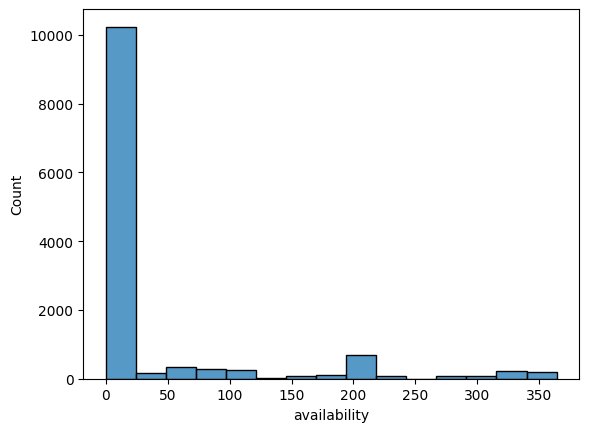

In [134]:
sns.histplot(data["availability"])

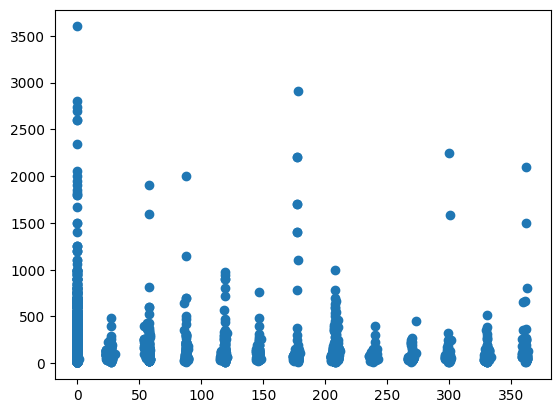

In [197]:
plt.scatter(data["availability"],data["price"])

The Distribution shows there is no correlation between availability and price.

So this column can be dropped.

##### Total sqft

<Axes: >

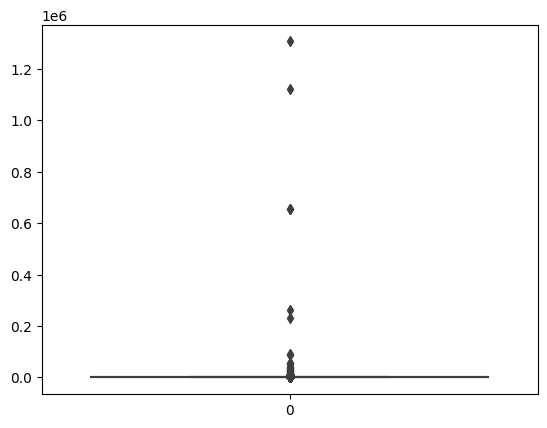

In [172]:
sns.boxplot(data["total_sqft"])

<Axes: xlabel='total_sqft', ylabel='Count'>

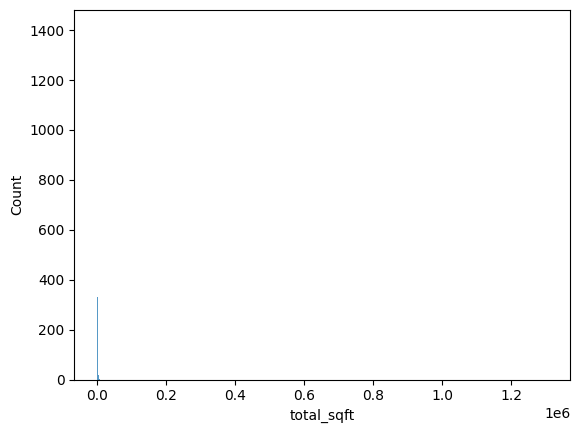

In [173]:
sns.histplot(data["total_sqft"])

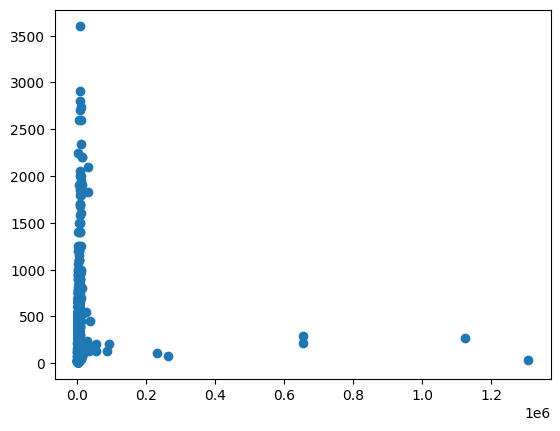

In [174]:
plt.scatter(data["total_sqft"],data["price"])

In [194]:
data[data["total_sqft"]>10000].shape

(41, 9)

In [179]:
temp=data[data["total_sqft"]<10000]

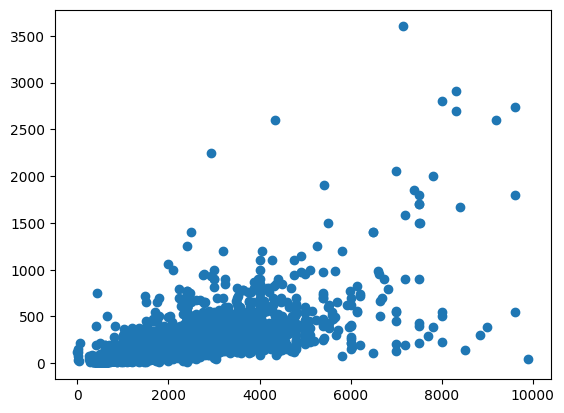

In [180]:
plt.scatter(temp["total_sqft"],temp["price"])

There are around 41 extreme outliers.

These can be capped because the price is in range.

#### Categorical columns

##### Area type

In [181]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,208,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,0,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,0,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,0,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,0,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [182]:
data["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [183]:
data["area_type"].value_counts()

Super built-up  Area    8331
Built-up  Area          2401
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

<Axes: xlabel='area_type', ylabel='count'>

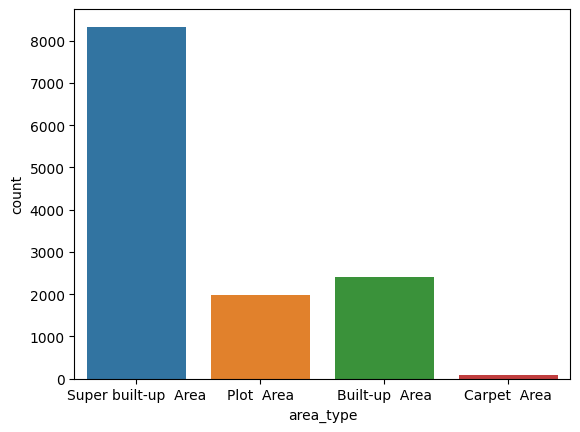

In [187]:
sns.countplot(x=data["area_type"])

The "area_type" column has only 4 categories, so this column can be one hot encoded.

##### Location

In [189]:
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [191]:
data["location"].nunique()

1304

There are totally 1304 locations it is not right to use one hot encoding here.

These Locations are grouped based on their mean or median price.

In [190]:
data["location"].value_counts()

Whitefield           524
Sarjapur  Road       379
Electronic City      290
Kanakpura Road       249
Thanisandra          229
                    ... 
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [214]:
grp=data.groupby("location")

In [223]:
grp.mean()

,availability,size,total_sqft,bath,balcony,price
location,,,,,,
Anekal,0.0,0.500000,351.000000,1.000000,1.0,16.000000
Banaswadi,0.0,0.500000,527.000000,1.000000,0.0,35.000000
Basavangudi,0.0,0.500000,670.000000,1.000000,1.0,50.000000
Bhoganhalli,208.0,0.500000,296.000000,1.000000,0.0,22.890000
Devarabeesana Halli,0.0,2.666667,1539.666667,2.666667,2.0,124.833333
...,...,...,...,...,...,...
t.c palya,0.0,6.000000,1350.000000,6.000000,3.0,160.000000
tc.palya,66.0,2.250000,1075.000000,2.000000,1.0,60.750000
vinayakanagar,0.0,7.000000,1200.000000,5.000000,2.0,200.000000


In [224]:
grp.median()

,availability,size,total_sqft,bath,balcony,price
location,,,,,,
Anekal,0.0,0.5,351.0,1.0,1.0,16.00
Banaswadi,0.0,0.5,527.0,1.0,0.0,35.00
Basavangudi,0.0,0.5,670.0,1.0,1.0,50.00
Bhoganhalli,208.0,0.5,296.0,1.0,0.0,22.89
Devarabeesana Halli,0.0,3.0,1671.0,3.0,2.0,149.50
...,...,...,...,...,...,...
t.c palya,0.0,6.0,1350.0,6.0,3.0,160.00
tc.palya,88.0,2.0,1010.0,2.0,1.0,58.50
vinayakanagar,0.0,7.0,1200.0,5.0,2.0,200.00


In [219]:
grp.mean()["price"].min()

15.0

In [220]:
grp.mean()["price"].max()

1900.0

In [221]:
grp.median()["price"].min()

15.0

In [222]:
grp.median()["price"].max()

1900.0

Mean and Median values are very simialr.

Based on median price, the locations are categorized.


In [233]:
q1_loc=grp.median()["price"].quantile(0.25)
q1_loc

56.089999999999996

In [234]:
q2_loc=grp.median()["price"].quantile(0.50)
q2_loc

81.015

In [235]:
q3_loc=grp.median()["price"].quantile(0.75)
q3_loc

145.0

In [236]:
q4_loc=grp.median()["price"].quantile(1)
q4_loc

1900.0

In [272]:
grp.median()[((grp.median()["price"]>=q1_loc) & (grp.median()["price"]<q2_loc))].reset_index()

,location,availability,size,total_sqft,bath,balcony,price
0,1st Stage Domlur,0.0,3.0,1350.0,2.0,2.0,65.00
1,1st Stage Indira Nagar,0.0,2.0,1400.0,2.0,1.0,67.00
2,3rd Phase Iti Layout,0.0,2.0,1145.0,2.0,1.0,63.00
3,3rd Stage Raja Rajeshwari Nagar,0.0,2.0,1300.0,3.0,1.0,65.00
4,4 Bedroom Farm House in Bagalur,88.0,4.0,10961.0,4.0,1.0,80.00
...,...,...,...,...,...,...,...
321,manyata park,239.0,2.5,1551.0,2.5,1.0,73.41
322,mvj engineering college,362.0,3.0,1200.0,3.0,1.0,56.53
323,"ravindra nagar, T.dasarahalli peenya",0.0,2.0,1180.0,2.0,2.0,74.00
324,rr nagar,0.0,2.0,1400.0,2.0,2.0,60.00


In [275]:
q1_location=grp.median()[(grp.median()["price"]<q1_loc)].reset_index()["location"]

In [276]:
q2_location=grp.median()[((grp.median()["price"]>=q1_loc) & (grp.median()["price"]<q2_loc))].reset_index()["location"]

In [277]:
q3_location=grp.median()[((grp.median()["price"]>=q2_loc) & (grp.median()["price"]<q3_loc))].reset_index()["location"]

In [278]:
q4_location=grp.median()[(grp.median()["price"]>=q3_loc)].reset_index()["location"]

In [283]:
set(q1_location).intersection(set(q2_location))

set()

In [266]:
data["location"]=="Whitefield"

0        False
1        False
2        False
3        False
4        False
         ...  
13314    False
13315     True
13316    False
13317    False
13318    False
Name: location, Length: 12808, dtype: bool

<Axes: xlabel='price', ylabel='Count'>

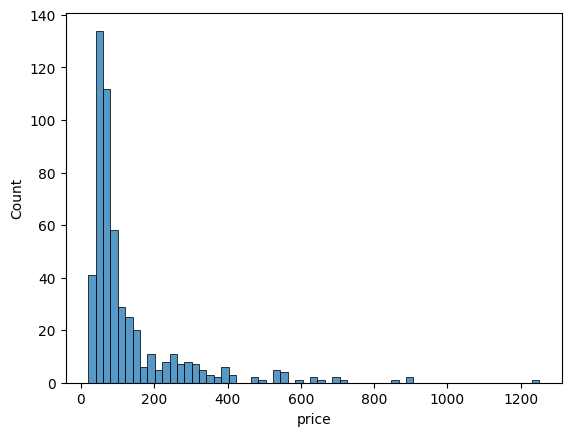

In [209]:
sns.histplot(data[data["location"]=="Whitefield"]["price"])

<Axes: xlabel='price', ylabel='Count'>

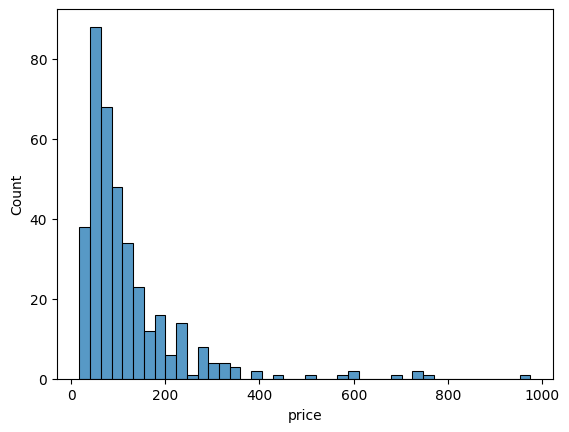

In [210]:
sns.histplot(data[data["location"]=="Sarjapur  Road"]["price"])

<Axes: xlabel='price', ylabel='Count'>

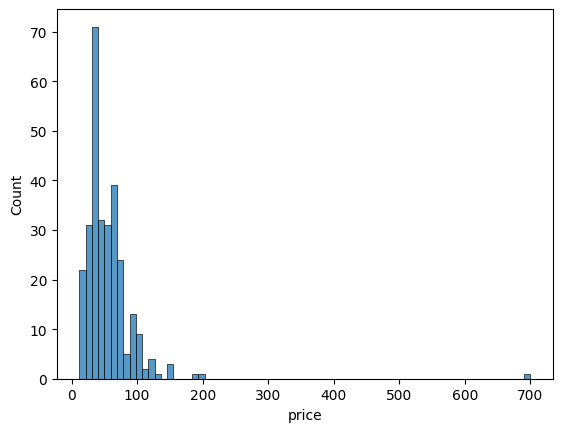

In [211]:
sns.histplot(data[data["location"]=="Electronic City"]["price"])

##### Society

In [192]:
data["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [193]:
data["society"].nunique()

2687

<Axes: xlabel='location', ylabel='price'>

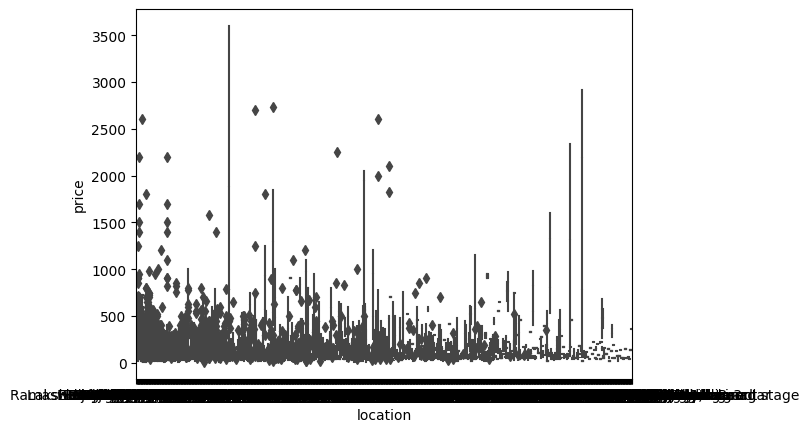

In [203]:
sns.boxplot(x=data["location"],y=data["price"])